In [2]:
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline



In [3]:
#df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_gcfp.txt',sep='\t')
df = pd.read_csv('C:\\Users\\fd299212\\Desktop\\lab_Stuff\\collaborations\\cady\\machineLearning\\lyme_data_20220520.csv')
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag
0,R49#02,1.983017,2.176121,5.882121,1.738615,1.790831,3.950600,1.065420,1.938904,2.021073,12.455842,1.077889,1.784387,Pos - Late
1,R49#03,0.999950,2.920710,0.824318,8.279458,5.255024,3.925302,2.137922,9.256009,2.859532,9.868273,1.632559,1.639504,Pos - Late
2,R49#04,1.303573,2.653693,1.484388,11.072503,2.456271,9.749722,1.851222,3.669641,3.945022,11.615196,2.025580,1.568635,Pos - Late
3,R49#11,0.951188,1.917436,1.394031,1.197008,1.415143,2.359241,1.012177,1.321336,1.372410,4.370095,0.999341,1.308891,Pos - Early Conv
4,R49#12,1.117383,2.436597,2.284072,1.397075,1.373926,1.932654,1.233269,1.517965,1.648289,10.357989,1.230867,1.622813,Pos - Early Conv


In [4]:
#create a feature that consolidates all pos types as one
df['bin_diag'] = "Neg"
df.loc[df['Diag']!="Neg", 'bin_diag'] = "Pos"

In [5]:
df.head()

,ID,P100,P41,OspC,DbpA,BmpA,DbpB,P45,P58,P66,VlsE,ErpL,OspD,Diag,bin_diag
0,R49#02,1.983017,2.176121,5.882121,1.738615,1.790831,3.950600,1.065420,1.938904,2.021073,12.455842,1.077889,1.784387,Pos - Late,Pos
1,R49#03,0.999950,2.920710,0.824318,8.279458,5.255024,3.925302,2.137922,9.256009,2.859532,9.868273,1.632559,1.639504,Pos - Late,Pos
2,R49#04,1.303573,2.653693,1.484388,11.072503,2.456271,9.749722,1.851222,3.669641,3.945022,11.615196,2.025580,1.568635,Pos - Late,Pos
3,R49#11,0.951188,1.917436,1.394031,1.197008,1.415143,2.359241,1.012177,1.321336,1.372410,4.370095,0.999341,1.308891,Pos - Early Conv,Pos
4,R49#12,1.117383,2.436597,2.284072,1.397075,1.373926,1.932654,1.233269,1.517965,1.648289,10.357989,1.230867,1.622813,Pos - Early Conv,Pos


In [6]:
#df['Diag'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        64 non-null     object 
 1   P100      64 non-null     float64
 2   P41       64 non-null     float64
 3   OspC      64 non-null     float64
 4   DbpA      64 non-null     float64
 5   BmpA      64 non-null     float64
 6   DbpB      64 non-null     float64
 7   P45       64 non-null     float64
 8   P58       64 non-null     float64
 9   P66       64 non-null     float64
 10  VlsE      64 non-null     float64
 11  ErpL      64 non-null     float64
 12  OspD      64 non-null     float64
 13  Diag      64 non-null     object 
 14  bin_diag  64 non-null     object 
dtypes: float64(12), object(3)
memory usage: 7.6+ KB


In [7]:
df.columns
#df.dtypes

Index(['ID', 'P100', 'P41', 'OspC', 'DbpA', 'BmpA', 'DbpB', 'P45', 'P58',
       'P66', 'VlsE', 'ErpL', 'OspD', 'Diag', 'bin_diag'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split
#X = df.drop(['Diag','ID'], axis=1)  
#X = df.filter(['VlsE', 'DbpA', 'DbpB', 'P58', 'OspC', 'BmpA', 'P45'],axis=1) 
X = df.filter(['VlsE', 'DbpA', 'DbpB', 'P58', 'OspC','ErpL','P66'],axis=1)
#Data Standardization gives the data zero mean and unit variance, it is considered good practice, 
#especially for algorithms such as KNN which is based on the distance of data points
#however, there is some disagreement about it for logistic regression...may require testing for specific dataset 
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]
y = df['bin_diag']
#split original dataset into training and testing subsets
#stratify=y ensures that the sampled sets attempt to represent each class's proportions as they were in the full set
#the 'y' does not mean 'yes' it is the y vectors of class labels
#note, random_state provides specific seed for pseudorandom generator to allow reproducible analysis of the model
#remove this parameter to allow random selection each run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)


In [9]:
#gridsearch enables automation of a cross validation on each combination of multiple 
#supplied parameters to find the best performing estimator. 
from sklearn.model_selection import GridSearchCV

In [10]:
#here, we are specifying the four common kernel functions and a range of associated hyperparameters ('C' and 'gamma')
#you may want to play with the C and gamma parameter values to fine tune around the results of the "best_estimator" after it is reported
#if you want to specify a large range of floating point values without typing them out,
#then use something like this: cvals = np.arange(.1, 4.0, .1,dtype=float)
cvals = [1,5,10,15,20]
#cvals = np.arange(8.90,9.1,.1)
#gvals = np.arange(.005,.015,.001)
gvals = [1,0.1,0.01,0.001]
param_grid = {'C': cvals, 'gamma': gvals,'kernel': ['linear','rbf', 'poly', 'sigmoid']}


In [11]:
#this code implelements the grid 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1

[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=5, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=5, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=5, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................C=10, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .......................C=20, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=20, gamma=1, kernel=linear; total time=   0.0s
[CV] END ..........................C=20, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=20, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=20, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=20, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=20, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=20, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=20, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=20, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=20, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=20, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [12]:
print(grid.best_estimator_)

SVC(C=15, gamma=1, kernel='linear')


In [13]:
#following lines are examples of printing individual parameters (see API docs for more info)
#print(grid.best_estimator_.C)
#print(grid.best_estimator_.kernel)
#print(grid.best_estimator_.gamma)

#will print all grid parameters
print(grid.get_params()) 



{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(), 'n_jobs': None, 'param_grid': {'C': [1, 5, 10, 15, 20], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': None, 'verbose': 2}


In [14]:
clf = grid.best_estimator_
#SVC(kernel=grid.best_estimator_.kernel, C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
clf.fit(X_train, y_train) 

SVC(C=15, gamma=1, kernel='linear')

In [15]:
#assign the determined best to the clf ('classifier') variable
#clf = grid.best_estimator_
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))#Output




[[7 1]
 [1 7]]
              precision    recall  f1-score   support

         Neg       0.88      0.88      0.88         8
         Pos       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16



In [16]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
import itertools

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
cnf_matrix = confusion_matrix(y_test, y_pred)


              precision    recall  f1-score   support

         Neg       0.88      0.88      0.88         8
         Pos       0.88      0.88      0.88         8

    accuracy                           0.88        16
   macro avg       0.88      0.88      0.88        16
weighted avg       0.88      0.88      0.88        16

Confusion matrix, without normalization
[[7 1]
 [1 7]]


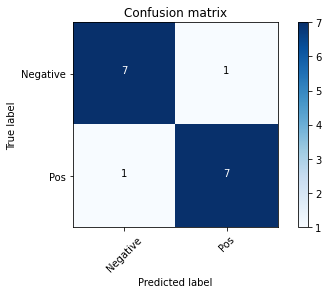

In [19]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Negative','Pos'],normalize= False,  title='Confusion matrix')

In [20]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted') 

0.875

In [21]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred, average='weighted')

0.7777777777777778

In [22]:
y_test

26    Neg
34    Pos
54    Neg
35    Pos
31    Neg
18    Neg
19    Neg
47    Pos
50    Pos
11    Pos
49    Pos
62    Neg
38    Pos
22    Neg
51    Pos
30    Neg
Name: bin_diag, dtype: object

In [23]:
y_pred

array(['Pos', 'Pos', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Pos', 'Pos', 'Neg', 'Pos', 'Neg', 'Pos', 'Neg'], dtype=object)

In [25]:
#this cell includes code to do 'n' runs of random train/tests on
#the whole data set using the best estimator settings from gridsearchCV
from sklearn import metrics 
accuracy_sum = 0
sensitivity_sum = 0
specificity_sum = 0

count = 100
new_model = SVC(kernel=grid.best_estimator_.kernel, C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
for n in range(1, count+1):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size = 0.25, stratify=y)   
    new_model.fit(X_tr, y_tr)
    yh = new_model.predict(X_te)
    cr = classification_report(y_te, yh, output_dict=True)
    
    curr_accuracy = metrics.accuracy_score(y_te,yh)
    curr_sensitivity = cr["Pos"]["recall"]
    curr_specificity = cr["Neg"]["recall"]
    print("Run: %d" % (n))
    print(' Accuracy: %.3f ' % (curr_accuracy))
    print(' Sensitivity: %.3f ' % (curr_sensitivity))
    print(' Specificity: %.3f ' % (curr_specificity))
    
    sensitivity_sum = sensitivity_sum + curr_sensitivity
    specificity_sum = specificity_sum + curr_specificity
    accuracy_sum = accuracy_sum + curr_accuracy

average_accuracy = accuracy_sum/count
average_sensitivity = sensitivity_sum/count
average_specificity = specificity_sum/count

print('Average Accuracy: %.3f ' % (average_accuracy))
print('Average Sensitivity: %.3f ' % (average_sensitivity))
print('Average Specificity: %.3f ' % (average_specificity))

Run: 1
 Accuracy: 0.938 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 2
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.857 
Run: 3
 Accuracy: 0.812 
 Sensitivity: 0.750 
 Specificity: 0.875 
Run: 4
 Accuracy: 0.938 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 5
 Accuracy: 1.000 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 6
 Accuracy: 0.938 
 Sensitivity: 0.875 
 Specificity: 1.000 
Run: 7
 Accuracy: 0.875 
 Sensitivity: 0.889 
 Specificity: 0.857 
Run: 8
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.857 
Run: 9
 Accuracy: 0.875 
 Sensitivity: 1.000 
 Specificity: 0.750 
Run: 10
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.875 
Run: 11
 Accuracy: 1.000 
 Sensitivity: 1.000 
 Specificity: 1.000 
Run: 12
 Accuracy: 0.750 
 Sensitivity: 0.556 
 Specificity: 1.000 
Run: 13
 Accuracy: 0.938 
 Sensitivity: 1.000 
 Specificity: 0.857 
Run: 14
 Accuracy: 0.938 
 Sensitivity: 0.889 
 Specificity: 1.000 
Run: 15
 Accuracy: 0.938 
 Sensitivity: 0.875 
 Specifici